## Introduction to computational science: Assignment 2 
### Sanne Donker: 10780416 
### Heleen Oude Nijhuis: 129492936


In [52]:
# Importing libraries and packages
import scipy.integrate
import scipy.optimize

from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.fftpack import fft
import matplotlib as mpl
from __future__ import division
mpl.rcParams['figure.dpi'] = 300
import matplotlib.patches as mpatches

## Functions for Gillespie's method

In [31]:
# Discrete event simulation
def sir_event_demo(y, t, beta, gamma):

    X, Y, Z, N = y
    X_list = [X]
    Y_list = [Y]
    Z_list = [Z]
    N_list = [N]

    time = 0
    time_list = [0]
    # counter = 0
    while time < t:

        # birth, transmission, recovery, death X, death Y, death Z
        rates = [mu * N, beta * X * Y / N, gamma * Y, mu * X, mu * Y, mu * Z]

        dt = []
        for j in range(6):
            u = np.random.uniform(0, 1)
            if rates[j] < 0.0001:
                dt.append(100000)
                # counter += 1
            else:
                dt.append(-np.log(u) / rates[j])

        first_event = dt.index(min(dt))

        if first_event == 0:
            X = X + 1
            N = N + 1

        elif first_event == 1:
            X = X - 1
            Y = Y + 1

        elif first_event == 2:
            Y = Y - 1
            Z = Z + 1

        elif first_event == 3:
            X = X - 1
            N = N -1

        elif first_event == 4:
            Y = Y - 1
            N = N - 1

        else:
            Z = Z - 1
            N = N - 1

        X_list.append(X)
        Y_list.append(Y)
        Z_list.append(Z)
        N_list.append(N)

        time += min(dt)
        time_list.append(time)

    return X_list, Y_list, Z_list, N_list, time_list




# Discrete event simulation
def sir_event_demo_imports(y, t, beta, gamma):

    X, Y, Z, N = y
    X_list = [X]
    Y_list = [Y]
    Z_list = [Z]
    N_list = [N]

    time = 0
    time_list = [0]
    counter = 0
    birth = 0
    transmission = 0
    recovery = 0
    deathX = 0
    deathY = 0
    deathZ = 0
    deathInfected = 0
    imports = 0
    passingthrough = 0
    while time < t:

        # birth, transmission, recovery, death X, death Y, death Z, death while infected
        # import, passing through
        rates = [mu * N, beta * X * Y / N, gamma * Y, mu * X, mu * Y, mu * Z, delta, epsilon * X]

        dt = []
        for j in range(len(rates)):
            u = np.random.uniform(0, 1)
            if rates[j] < 0.0001:
                dt.append(100000)
                counter += 1
            else:
                dt.append(-np.log(u) / rates[j])

        first_event = dt.index(min(dt))
        # print(first_event)

        if first_event == 0:
            X = X + 1
            N = N + 1
            birth += 1

        elif first_event == 1:
            X = X - 1
            Y = Y + 1
            transmission += 1

        elif first_event == 2:
            Y = Y - 1
            Z = Z + 1
            recovery += 1

        elif first_event == 3:
            X = X - 1
            N = N - 1
            deathX += 1

        elif first_event == 4:
            Y = Y - 1
            N = N - 1
            deathY += 1

        elif first_event == 5:
            Z = Z - 1
            N = N - 1
            deathZ += 1

        elif first_event == 6:
            Y = Y + 1
            N = N + 1
            imports += 1

        else:
            X = X - 1
            Y = Y + 1
            passingthrough += 1

        X_list.append(X)
        Y_list.append(Y)
        Z_list.append(Z)
        N_list.append(N)

        time += min(dt)
        time_list.append(time)

    print(birth, transmission, recovery, deathX, deathY, deathZ, imports, passingthrough)
    return X_list, Y_list, Z_list, N_list, time_list




## Variability

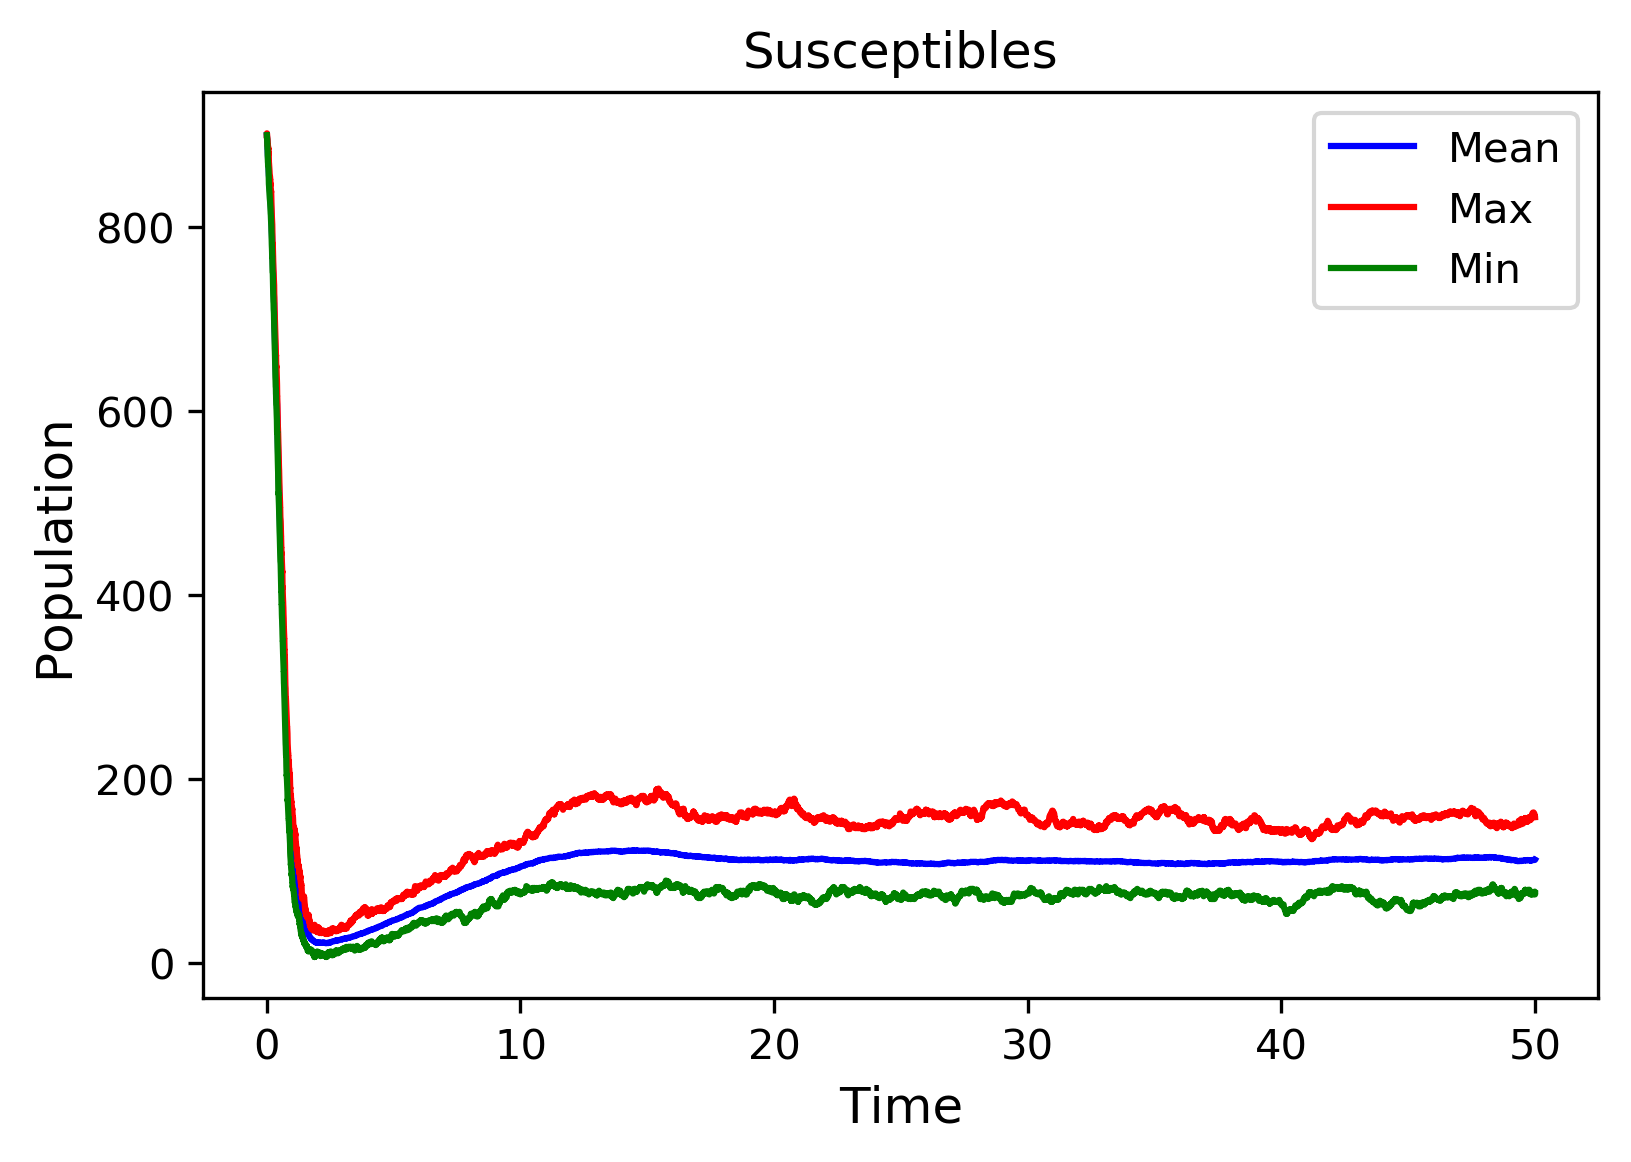

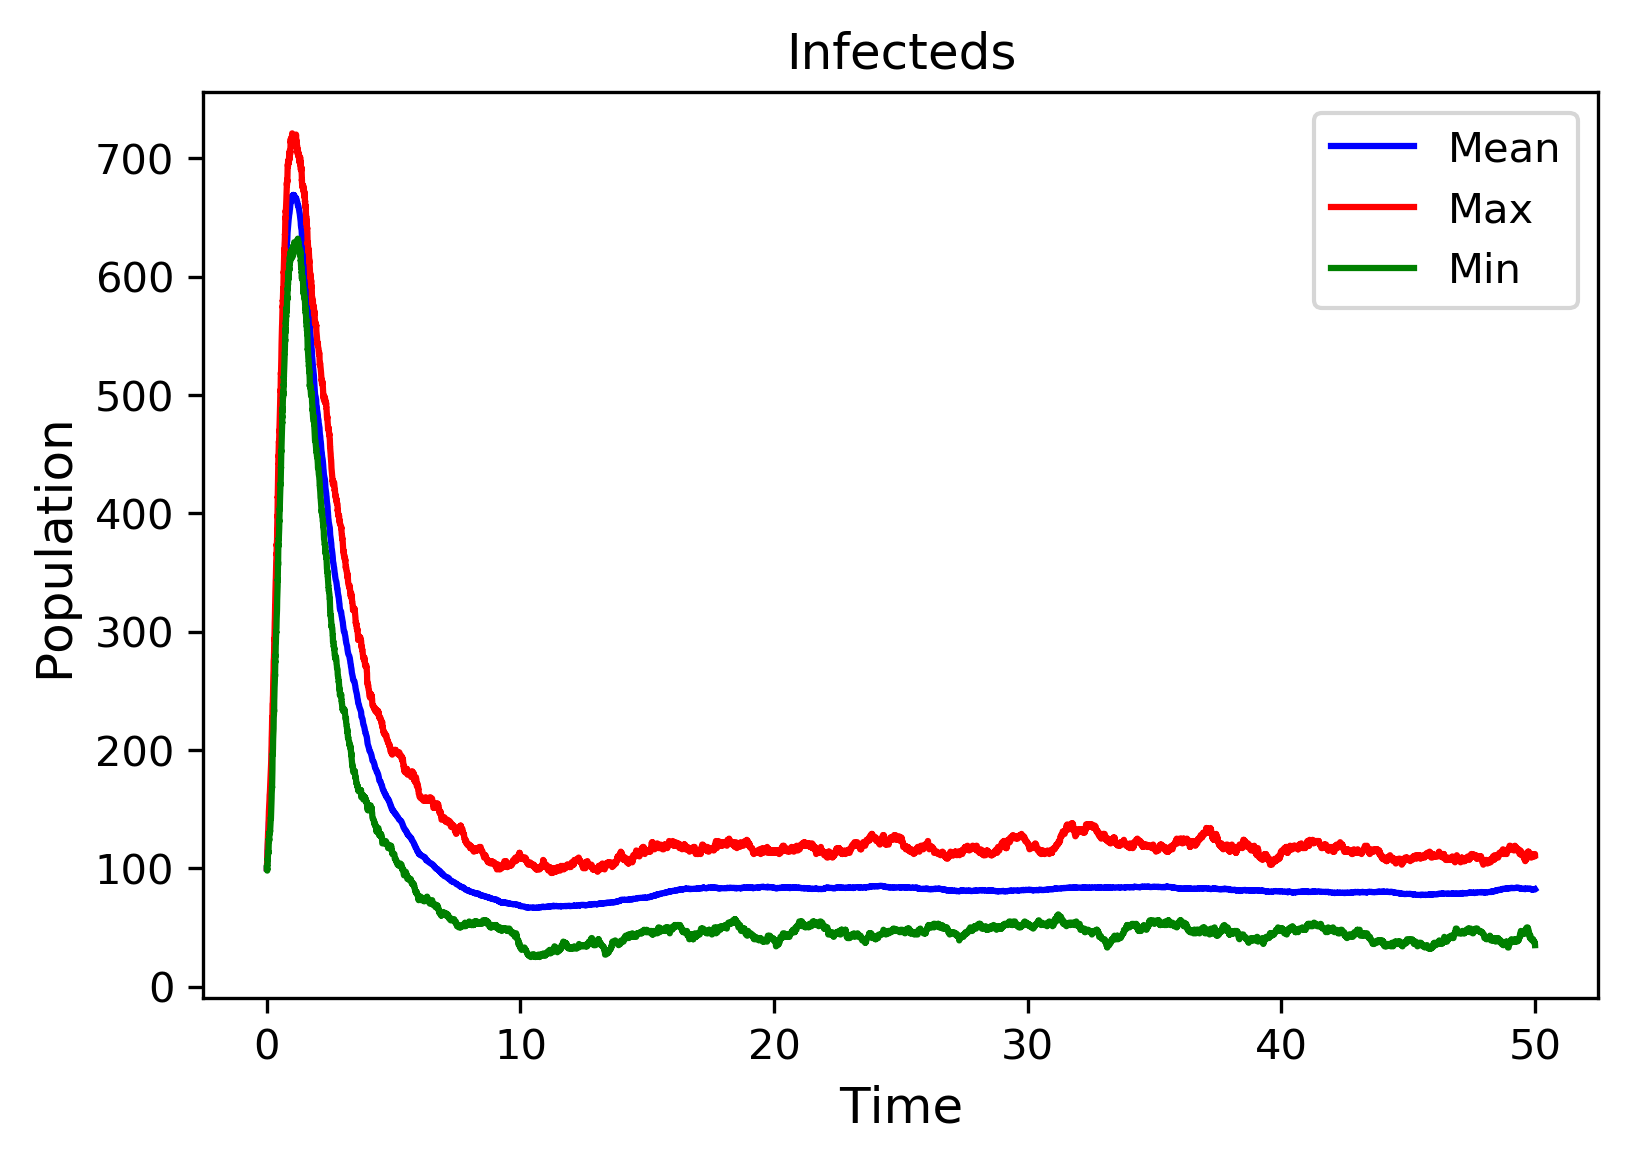

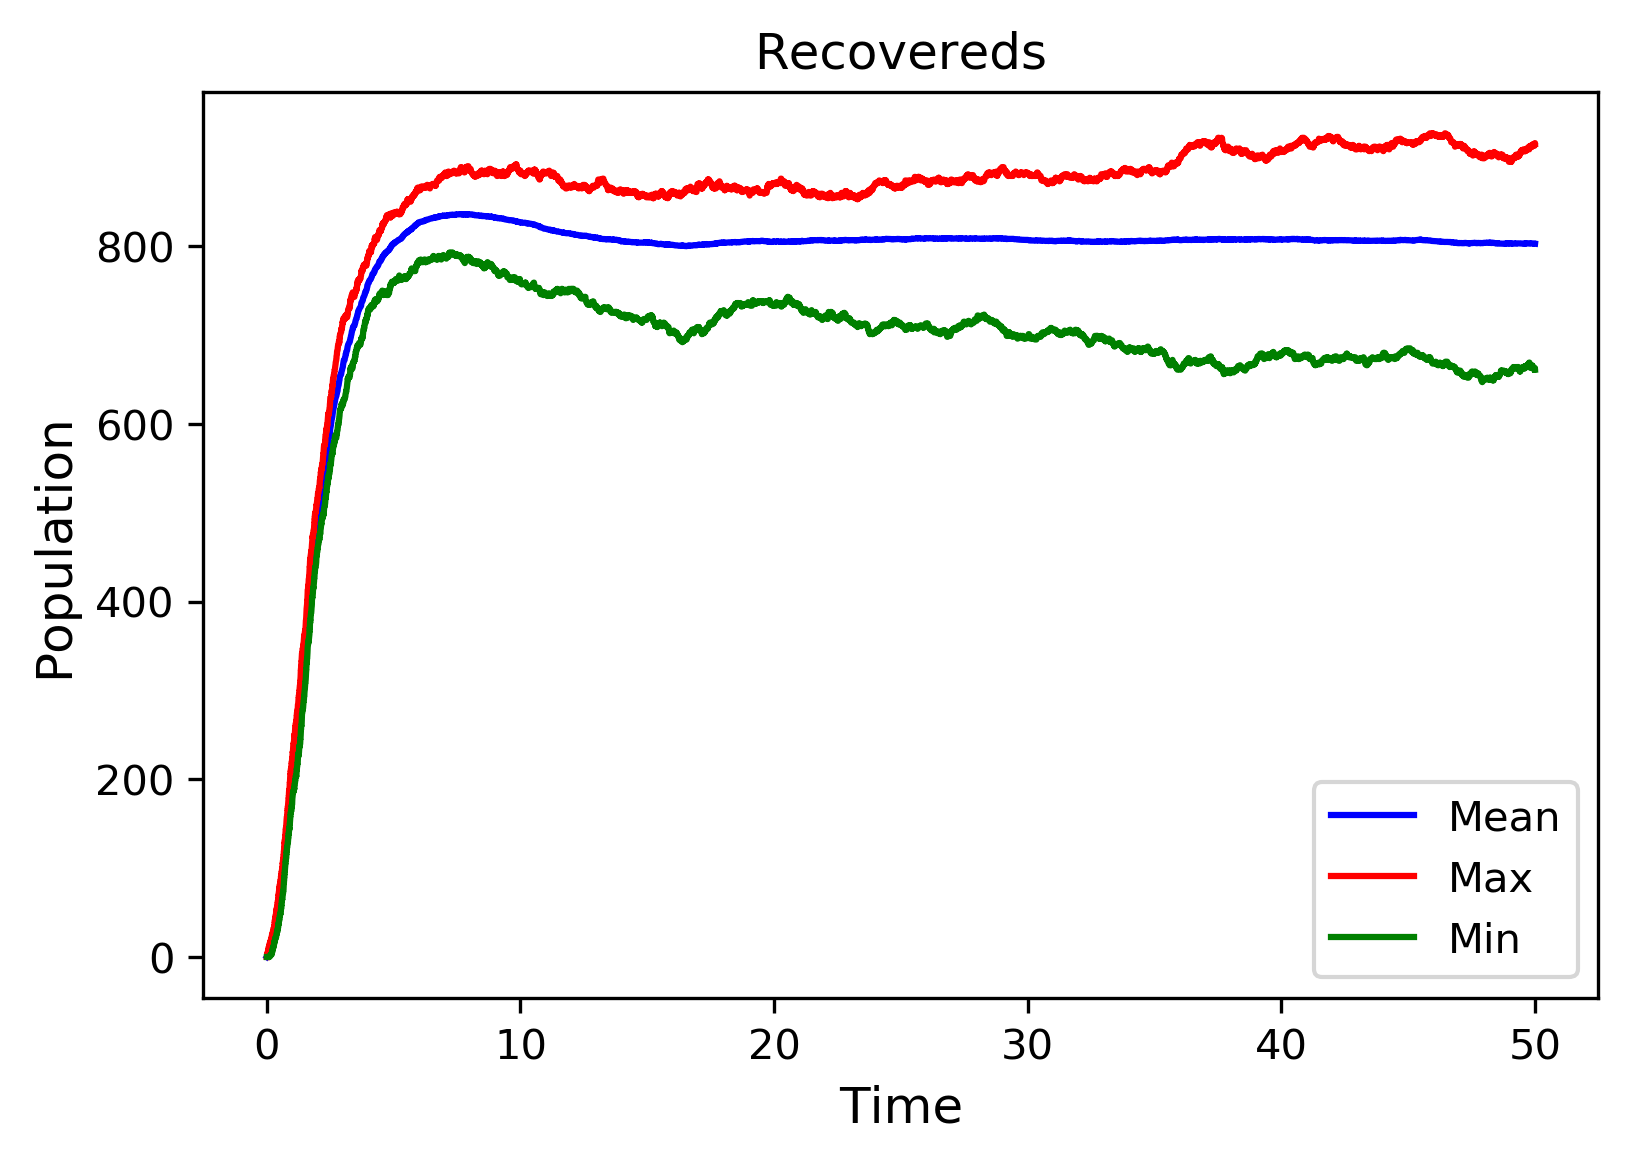

In [32]:
def variability(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)
    mean_X = []
    max_X = []
    min_X = []
    for i in range(minimum_length):
        timestep = []
        for j in range(runs):
            timestep.append(X_list[j][i])
        mean_X.append(np.mean(timestep))
        max_X.append(max(timestep))
        min_X.append(min(timestep))

    plt.plot(time_list[index_t], mean_X, 'b', label="Mean")
    plt.plot(time_list[index_t], max_X, 'r', label="Max")
    plt.plot(time_list[index_t], min_X, 'g', label="Min")
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Population", fontsize=12)
    plt.legend()

    plt.show()


def variability2(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X, Y, Z
    For constant population, if pop not constant uncomment the N_list lines
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    outcomes = [X_list, Y_list, Z_list]
    names = ["Susceptibles.png", "Infecteds.png", "Recovereds.png"]

    # get shortest length
    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)

    # plot for every class
    for k in range(len(outcomes)):

        # save mean, max and min per timestep
        mean_list = []
        max_list = []
        min_list = []
        for i in range(minimum_length):
            timestep = []
            for j in range(runs):
                timestep.append(outcomes[k][j][i])
            mean_list.append(np.mean(timestep))
            max_list.append(max(timestep))
            min_list.append(min(timestep))

        # plot mean, max and min
        mean_line = plt.plot(time_list[index_t], mean_list, 'b', label="Mean")
        max_line = plt.plot(time_list[index_t], max_list, 'r', label="Max")
        min_line = plt.plot(time_list[index_t], min_list, 'g', label="Min")

        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Population", fontsize=12)
        plt.title(names[k][:-4])
        plt.legend()
        plt.savefig(names[k], dpi=300)
        plt.show()

    # blue = mpatches.Patch(color="b", label="Mean")
    # red = mpatches.Patch(color="r", label="Max")
    # green = mpatches.Patch(color="g", label="Min")
    # plt.legend(handles=[blue, red, green])

    
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0

t = 50
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
variability2(100, y0, t, beta, gamma)


## Co-variance

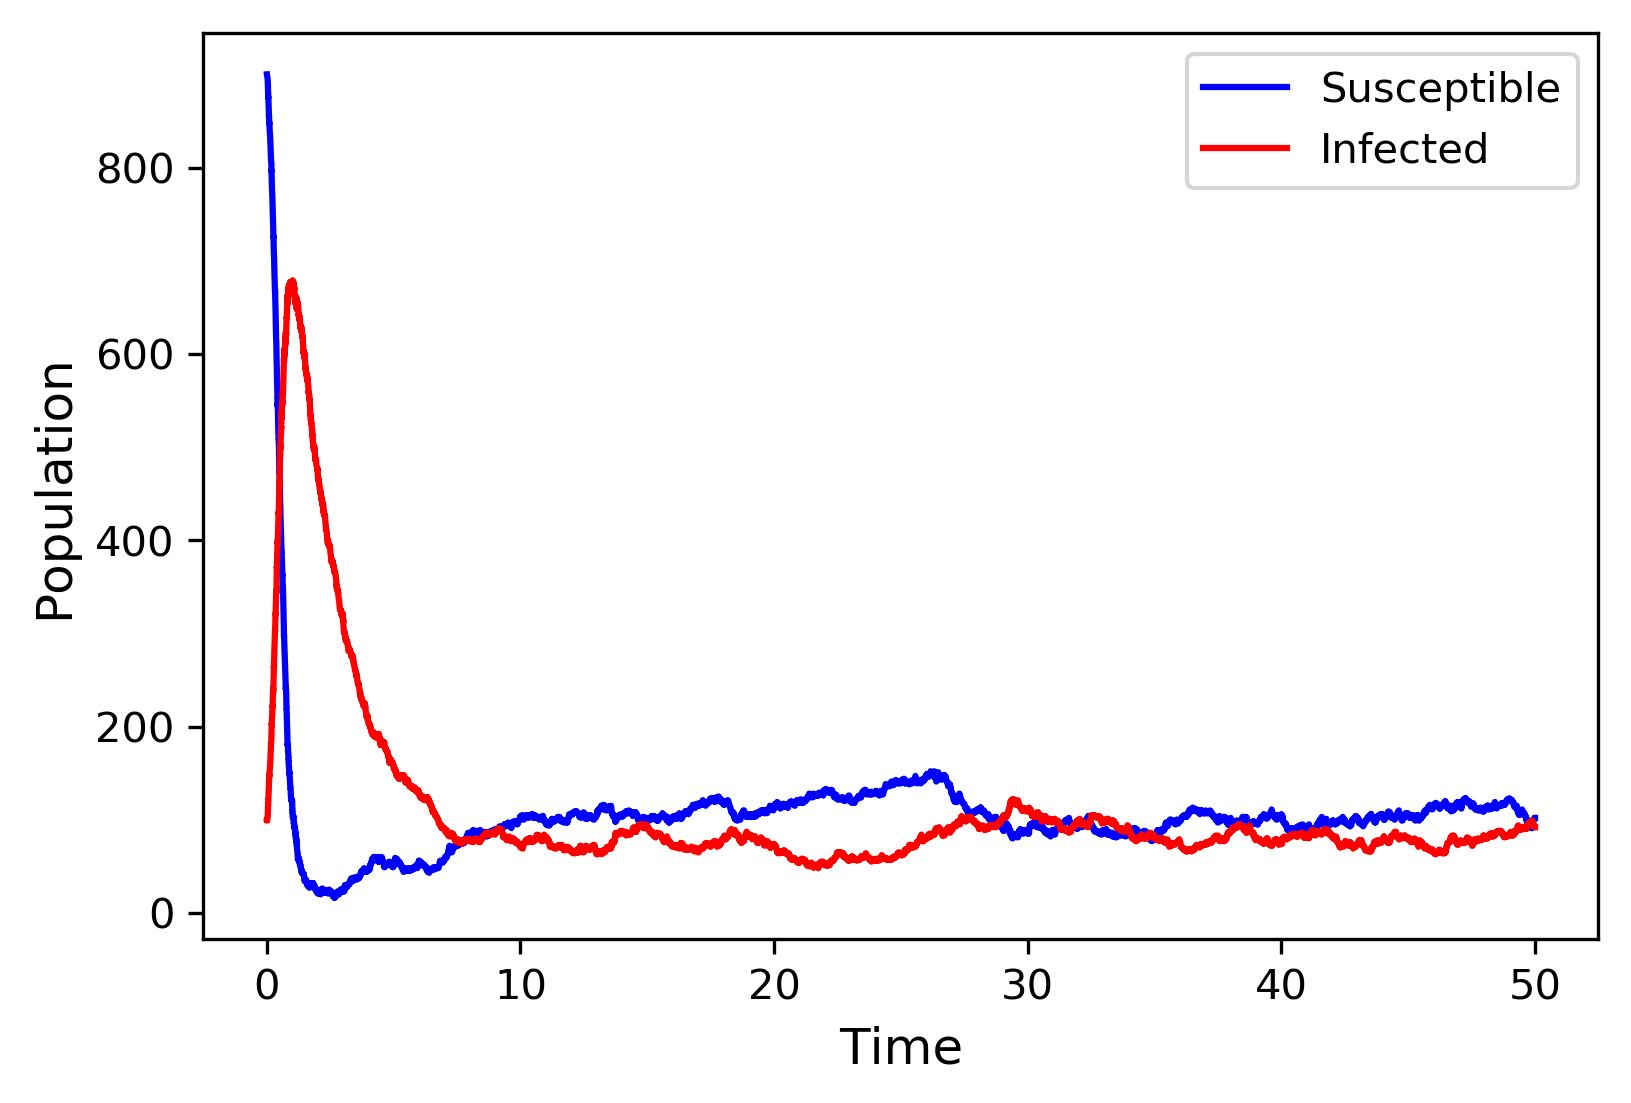

In [33]:
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0

t = 50
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001


#Generate solutions
X_det, Y_det, Z_det, N_det, time_list_det = sir_event_demo(y0, t, beta, gamma)

plt.plot(time_list_det, X_det, 'b', label="Susceptible")
plt.plot(time_list_det, Y_det, 'r', label="Infected")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.show()

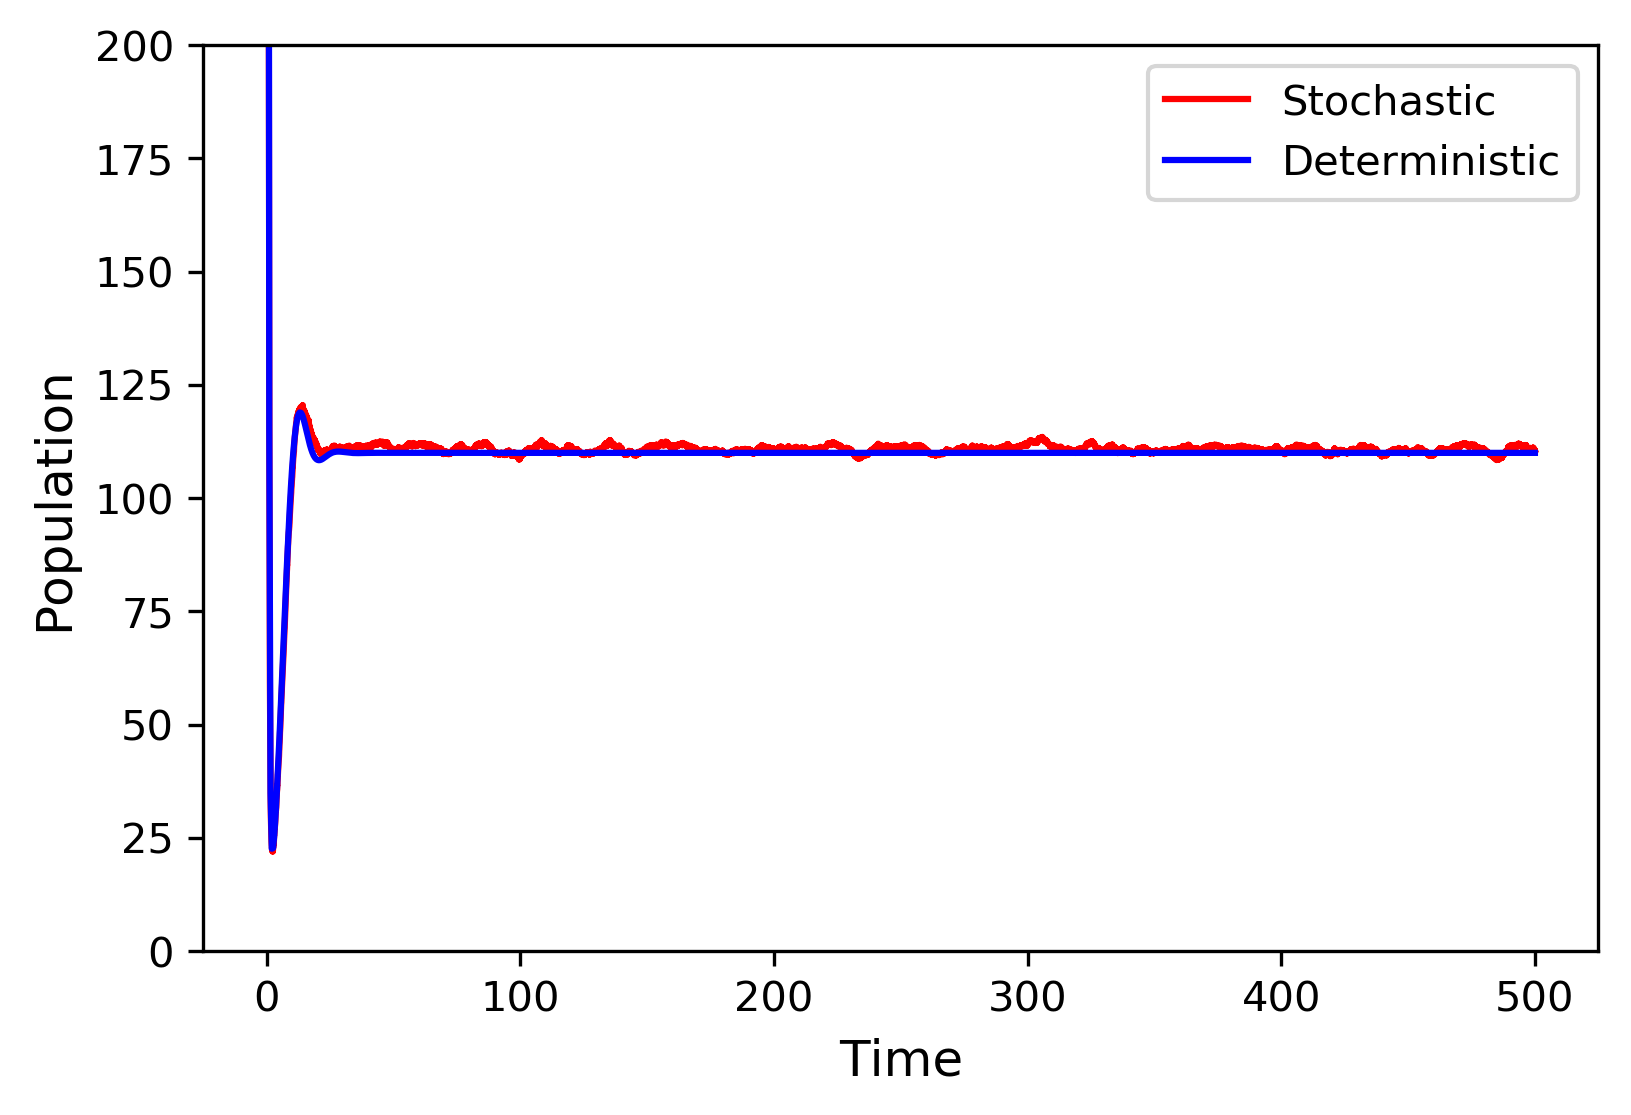

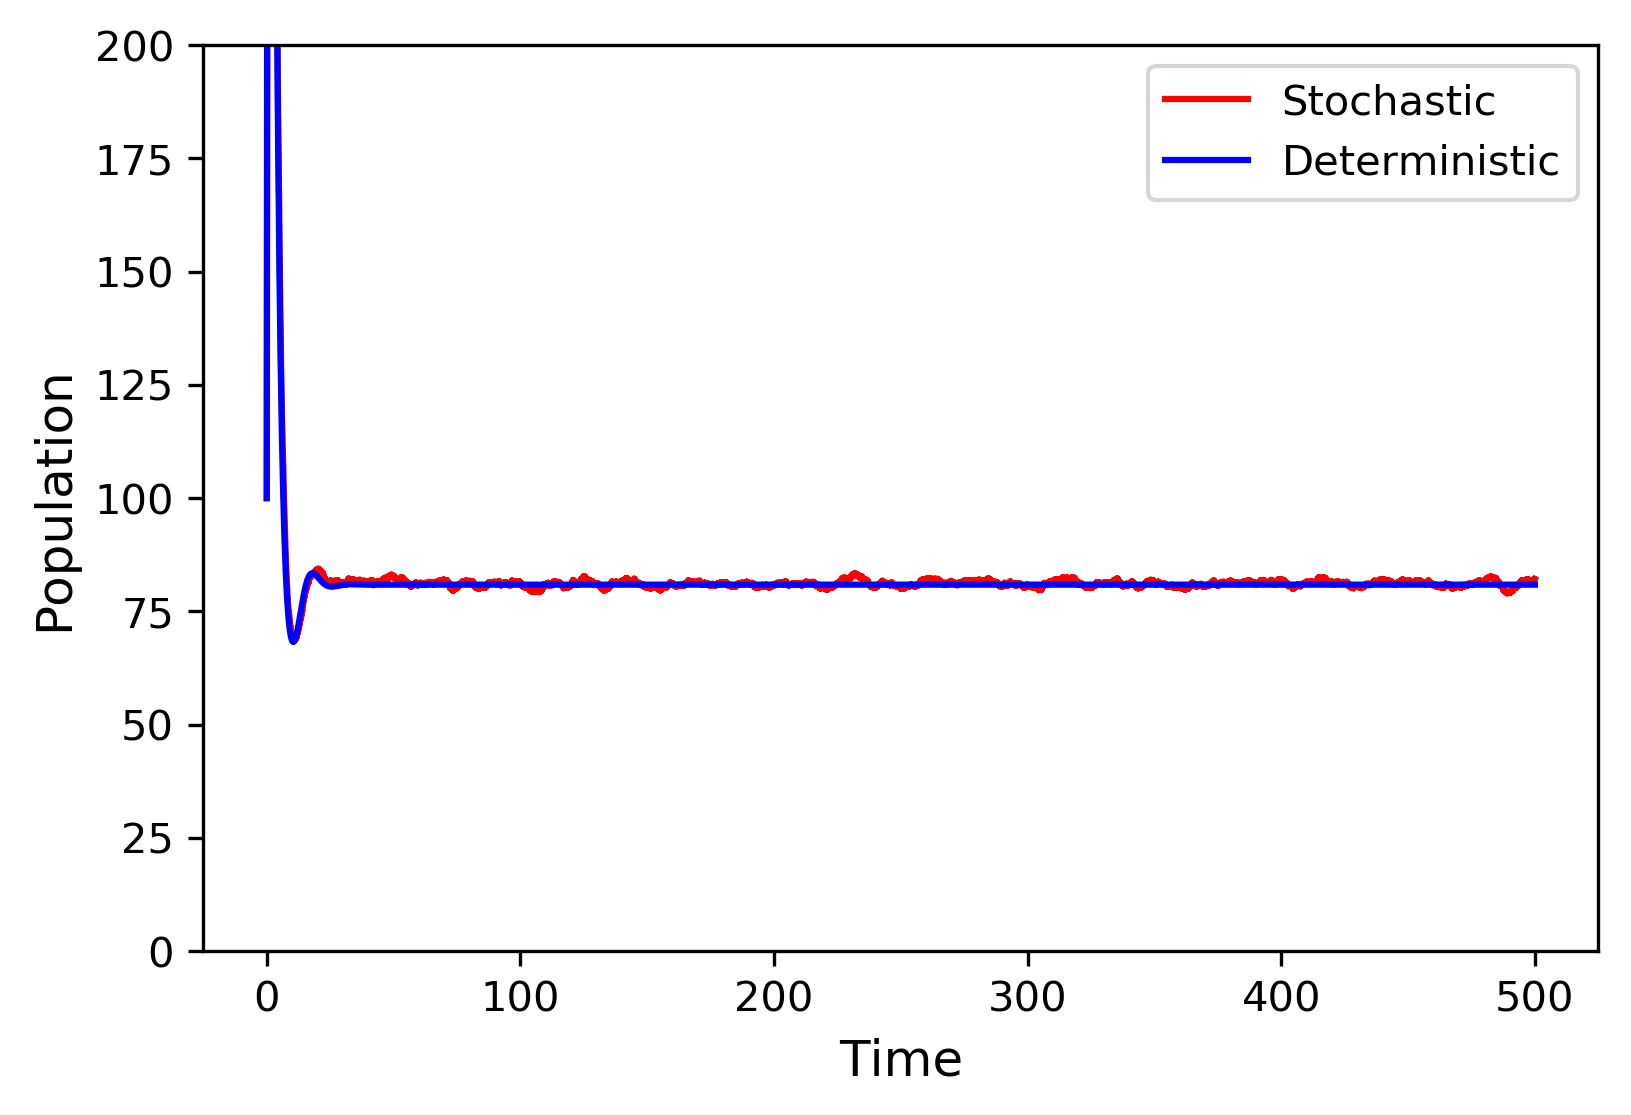

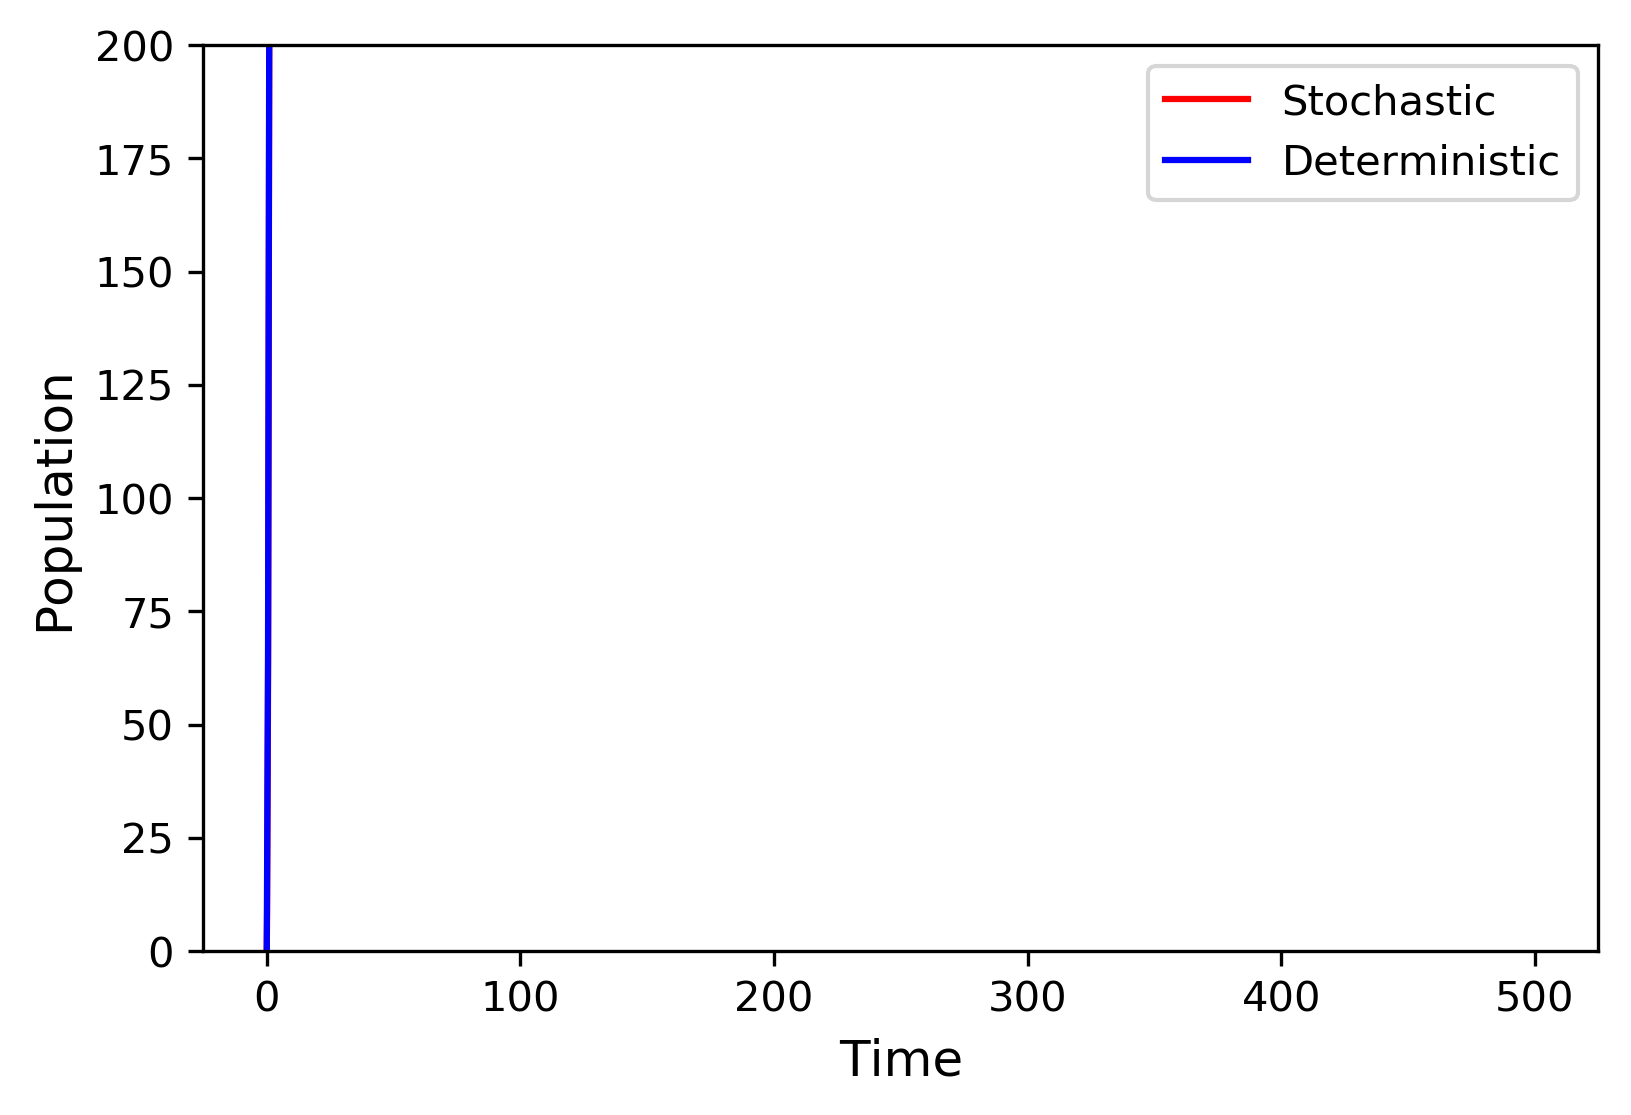

In [53]:
def variability(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)
    mean_X = []
    max_X = []
    min_X = []
    for i in range(minimum_length):
        timestep = []
        for j in range(runs):
            timestep.append(X_list[j][i])
        mean_X.append(np.mean(timestep))
        max_X.append(max(timestep))
        min_X.append(min(timestep))

    plt.plot(time_list[index_t], mean_X, 'b', label="Mean")
    plt.plot(time_list[index_t], max_X, 'r', label="Max")
    plt.plot(time_list[index_t], min_X, 'g', label="Min")
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Population", fontsize=12)
    plt.legend()

    plt.show()


def variability2(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X, Y, Z
    For constant population, if pop not constant uncomment the N_list lines
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    outcomes = [X_list, Y_list, Z_list]
    names = ["Susceptibles.png", "Infecteds.png", "Recovereds.png"]

    # get shortest length
    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)

    # plot for every class
    for k in range(len(outcomes)):

        # save mean, max and min per timestep
        mean_list = []
        max_list = []
        min_list = []
        for i in range(minimum_length):
            timestep = []
            for j in range(runs):
                timestep.append(outcomes[k][j][i])
            mean_list.append(np.mean(timestep))
            max_list.append(max(timestep))
            min_list.append(min(timestep))

        # plot mean, max and min
        mean_line = plt.plot(time_list[index_t], mean_list, 'r', label="Stochastic")
        #max_line = plt.plot(time_list[index_t], max_list, 'r', label="Max")
        #min_line = plt.plot(time_list[index_t], min_list, 'g', label="Min")
        det_line = plt.plot(t_det, ret[:,k]*N0, 'b', label="Deterministic")

        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Population", fontsize=12)
        plt.ylim(0, 200)
        plt.legend()
        plt.show()

    # blue = mpatches.Patch(color="b", label="Mean")
    # red = mpatches.Patch(color="r", label="Max")
    # green = mpatches.Patch(color="g", label="Min")
    # plt.legend(handles=[blue, red, green])

    
# Deterministic model
def diff(y, t, beta, gamma):
    S, I, R, N = y
    dSdt = mu * N -beta * S * I / N - mu * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dNdt = dSdt + dIdt + dRdt
    return [dSdt, dIdt, dRdt, dNdt]




# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 500
t_det = np.linspace(0,t,1000)
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
#ret = odeint(diff, y_det0, t_det, args=(beta, gamma))
#variability2(500, y0, t, beta, gamma)


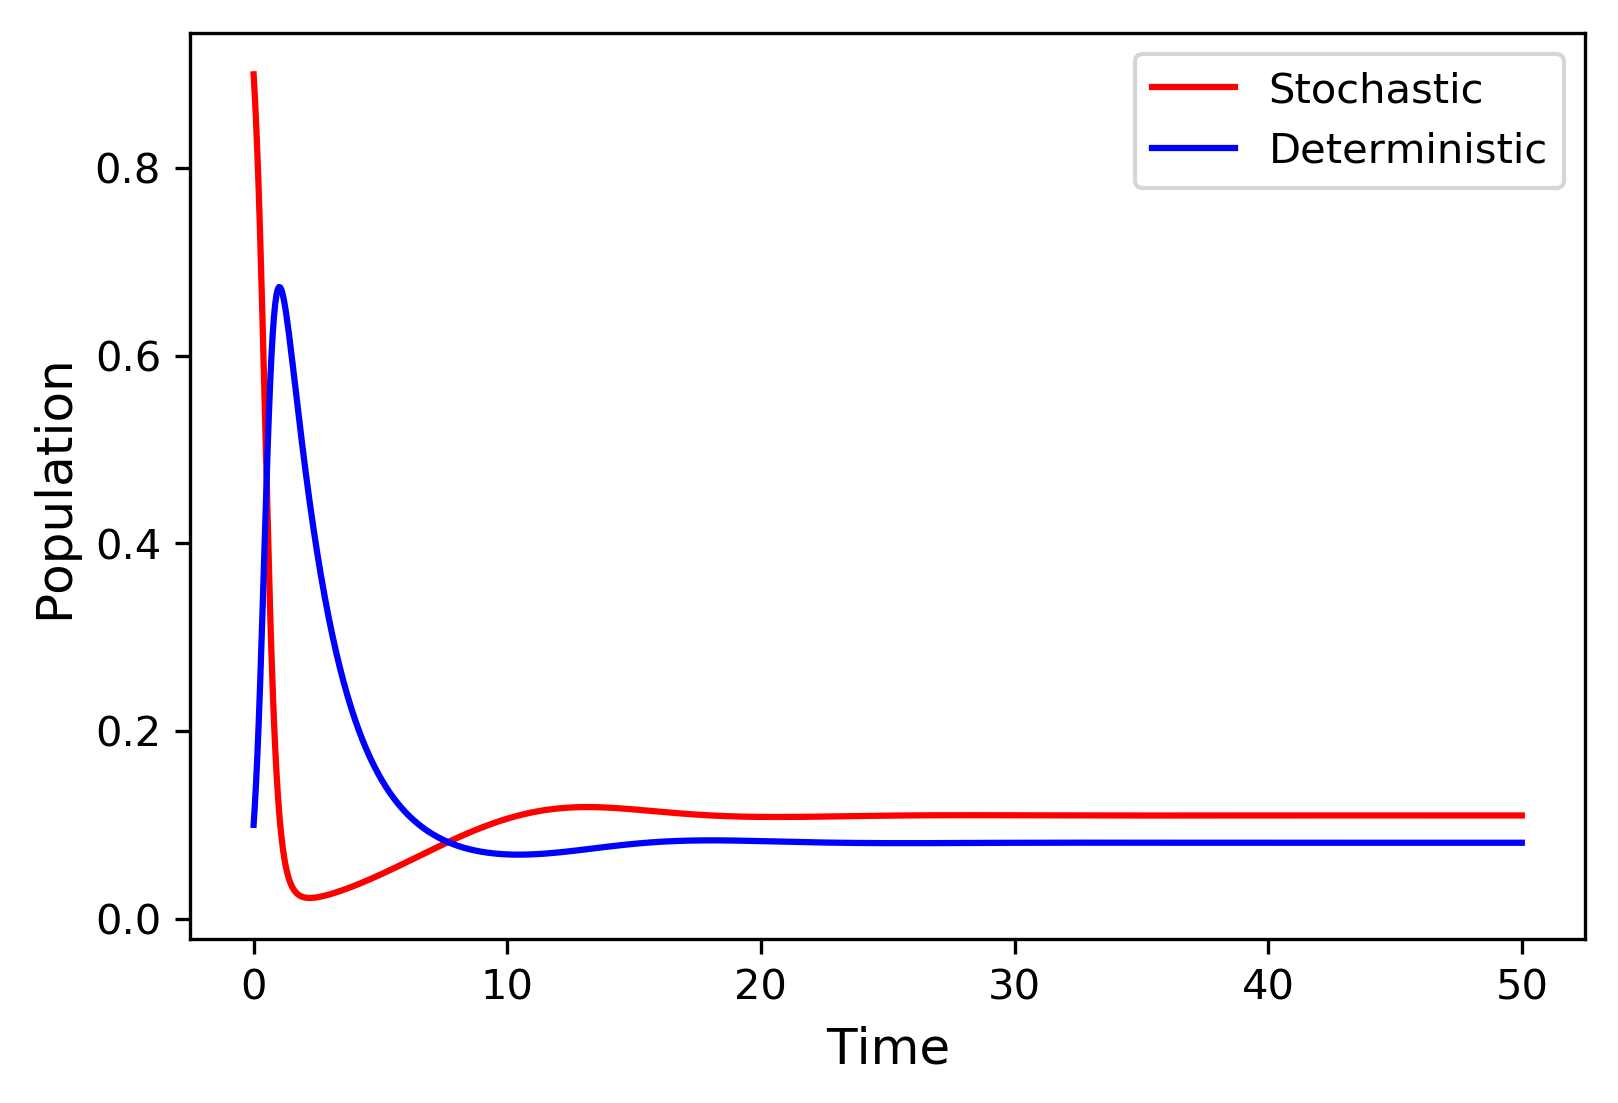

In [56]:
# Covariance in deterministic model
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 50
t_det = np.linspace(0,t,1000)
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

ret = odeint(diff, y_det0, t_det, args=(beta, gamma))

plt.plot(t_det, ret[:,0], 'r', label="Stochastic")
plt.plot(t_det, ret[:,1], 'b', label="Deterministic")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.show()

In [ ]:
def variability(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)
    mean_X = []
    max_X = []
    min_X = []
    for i in range(minimum_length):
        timestep = []
        for j in range(runs):
            timestep.append(X_list[j][i])
        mean_X.append(np.mean(timestep))
        max_X.append(max(timestep))
        min_X.append(min(timestep))

    plt.plot(time_list[index_t], mean_X, 'b', label="Mean")
    plt.plot(time_list[index_t], max_X, 'r', label="Max")
    plt.plot(time_list[index_t], min_X, 'g', label="Min")
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Population", fontsize=12)
    plt.legend()

    plt.show()


def variability2(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X, Y, Z
    For constant population, if pop not constant uncomment the N_list lines
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    covariance_list = []
    negative_covariance_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    outcomes = [X_list, Y_list, Z_list]
    
    two_d = np.vstack((np.asarray(X_list), np.asarray(Y_list)))
    covariance_list.append(np.cov(two_d))
    negative_covariance_list(X_list, Y_list)
    
    names = ["Susceptibles.png", "Infecteds.png", "Recovereds.png"]

    # get shortest length
    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)

    # plot for every class
    for k in range(len(outcomes)):

        # save mean, max and min per timestep
        mean_list = []
        max_list = []
        min_list = []
        for i in range(minimum_length):
            timestep = []
            for j in range(runs):
                timestep.append(outcomes[k][j][i])
            mean_list.append(np.mean(timestep))
            max_list.append(max(timestep))
            min_list.append(min(timestep))

        # plot mean, max and min
        mean_line = plt.plot(time_list[index_t], mean_list, 'r', label="Stochastic")
        max_line = plt.plot(time_list[index_t], max_list, 'r', label="Max")
        min_line = plt.plot(time_list[index_t], min_list, 'g', label="Min")
        #det_line = plt.plot(t_det, ret[:,k]*N0, 'b', label="Deterministic")

        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Population", fontsize=12)
        plt.ylim(0, 200)
        plt.legend()
        plt.show()
        
        

    # blue = mpatches.Patch(color="b", label="Mean")
    # red = mpatches.Patch(color="r", label="Max")
    # green = mpatches.Patch(color="g", label="Min")
    # plt.legend(handles=[blue, red, green])

    
# Deterministic model
def diff(y, t, beta, gamma):
    S, I, R, N = y
    dSdt = mu * N -beta * S * I / N - mu * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dNdt = dSdt + dIdt + dRdt
    return [dSdt, dIdt, dRdt, dNdt]




# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 140
t_det = np.linspace(0,t,1000)
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
variability2(100, y0, t, beta, gamma)

## Increased transients and stochastic resonance

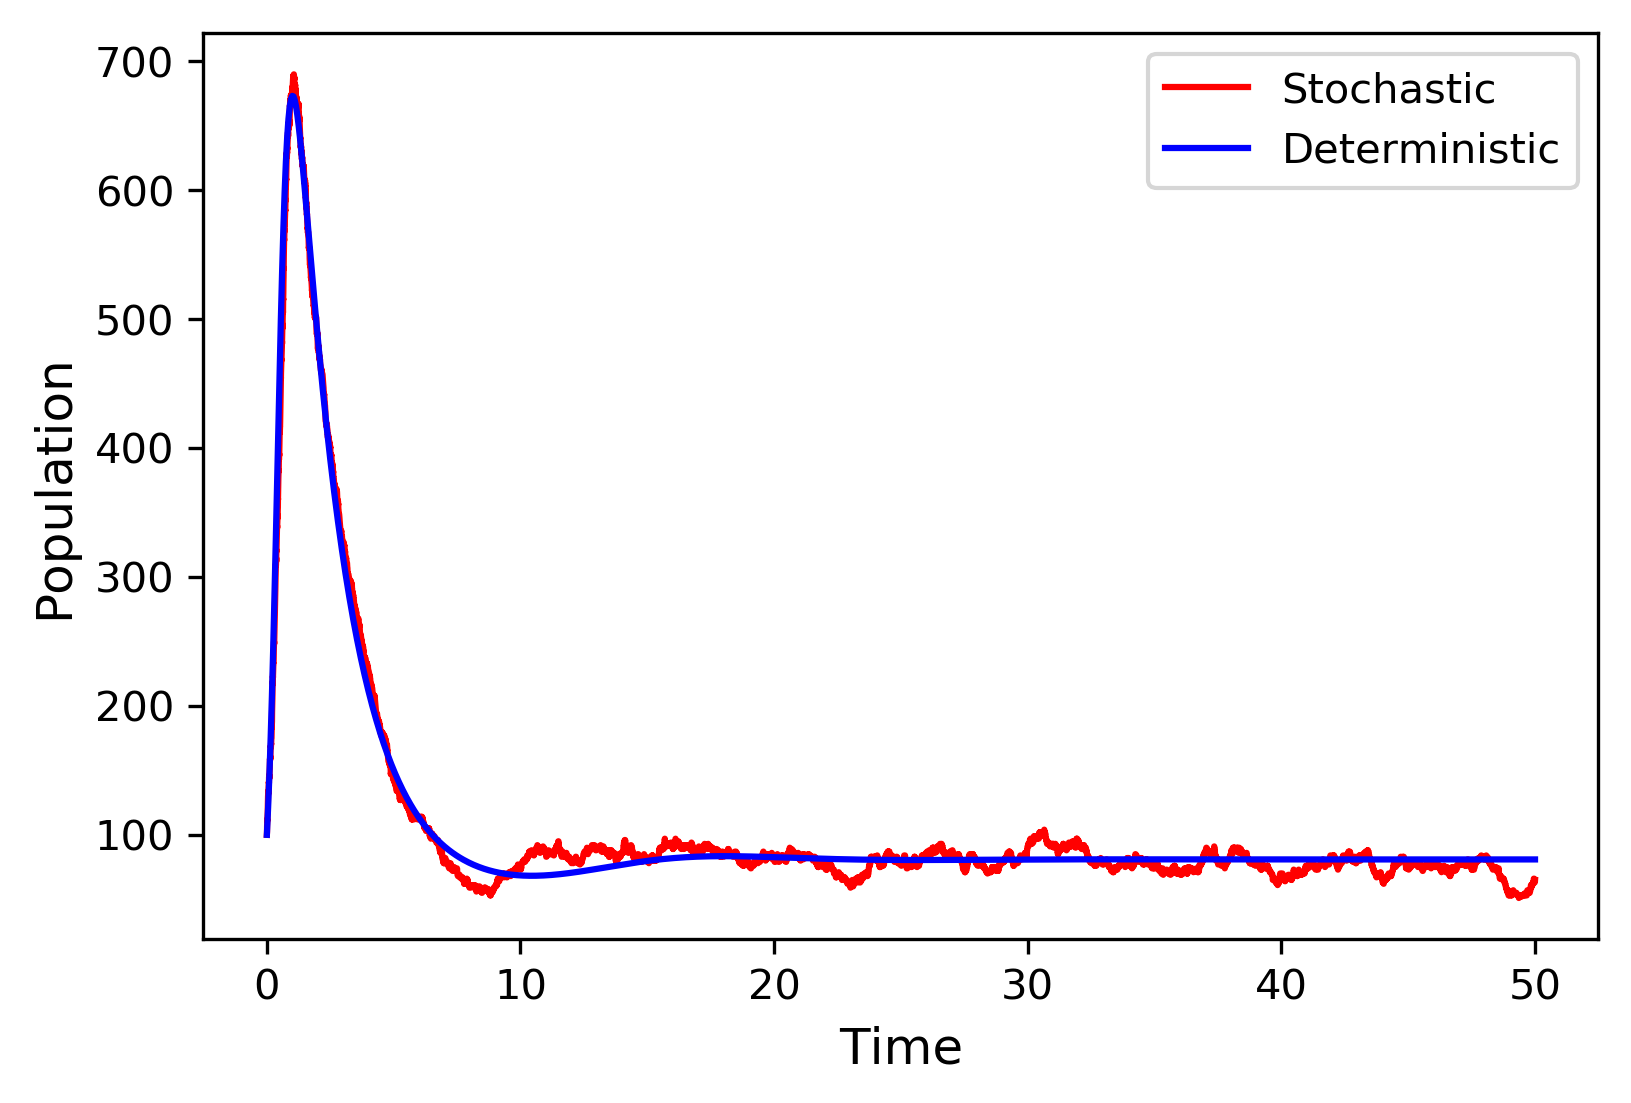

In [54]:
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 50
t_det = np.linspace(0,t,1000)
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)
ret = odeint(diff, y_det0, t_det, args=(beta, gamma))

plt.plot(time_list, Y, 'r', label="Stochastic")
plt.plot(t_det, ret[:,1]*N0, 'b', label="Deterministic")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.show()



In [ ]:
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)

plt.plot(X, Y, 'r', label="Stochastic")

t = np.linspace(0, 150, 1000)

ret = odeint(diff, y0, t, args=(beta, gamma))
X, Y, Z, N = ret.T
plt.plot(X, Y, 'b', label="Deterministic")


# # NEGATIVE COVARIANCE EXPERIMENT
# def negative_covariance(X, Y):
#     two_d = np.vstack((np.asarray(X), np.asarray(Y)))
#     print(np.cov(two_d))

# negative_covariance(X, Y)

# PHASEPOLOT INCREASED TRANSIENTS
#plt.plot(X, Y)

plt.xlabel("Number of susceptible individuals", fontsize=12)
plt.ylabel("Number of infected individuals", fontsize=12)
plt.ticklabel_format(style='sci', scilimits=(0,0))
plt.legend()
plt.savefig("phaseplot_transients.png", dpi=300)
plt.show()



#  # plot S(t), I(t) and R(t)
# plt.plot(time_list, X, 'b', label="Susceptible")
# plt.plot(time_list, Y, 'r', label="Infected")
# # plt.plot(time_list, Z, 'g', label="Recovered")
# # plt.plot(time_list, N, 'y', label="Population")
# plt.xlabel("Time", fontsize=12)
# plt.ylabel("Population", fontsize=12)
# plt.grid(True, axis='x')
# plt.legend()
#
# plt.savefig("negative_covariance.png", dpi=300)
# plt.show()

## Extinctions

In [ ]:
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 50
t_det = np.linspace(0,t,1000)
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)

plt.plot(time_list, Y, 'r', label="Stochastic")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.show()


In [ ]:
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)
# print(time_list)

#plt.plot(X, Y, 'r', label="Stochastic")
plt.plot(time_list, Y, 'r', label="Stochastic")

t = np.linspace(0, 150, 1000)

ret = odeint(diff, y0, t, args=(beta, gamma))
X, Y, Z, N = ret.T
#plt.plot(X, Y, 'b', label="Deterministic")
plt.plot(t, Y, 'b', label="Stochastic")


# # NEGATIVE COVARIANCE EXPERIMENT
# def negative_covariance(X, Y):
#     two_d = np.vstack((np.asarray(X), np.asarray(Y)))
#     print(np.cov(two_d))

# negative_covariance(X, Y)

# PHASEPOLOT INCREASED TRANSIENTS
#plt.plot(X, Y)

plt.xlabel("Number of susceptible individuals", fontsize=12)
plt.ylabel("Number of infected individuals", fontsize=12)
plt.ticklabel_format(style='sci', scilimits=(0,0))
plt.legend()
plt.savefig("phaseplot_transients.png", dpi=300)
plt.show()



#  # plot S(t), I(t) and R(t)
# plt.plot(time_list, X, 'b', label="Susceptible")
# plt.plot(time_list, Y, 'r', label="Infected")
# # plt.plot(time_list, Z, 'g', label="Recovered")
# # plt.plot(time_list, N, 'y', label="Population")
# plt.xlabel("Time", fontsize=12)
# plt.ylabel("Population", fontsize=12)
# plt.grid(True, axis='x')
# plt.legend()
#
# plt.savefig("negative_covariance.png", dpi=300)
# plt.show()

## Meta-population 